## Speedtest import workflow
### Follow steps to import global data, extract AUS, check unique (line count) and save locally and figshare
Created: Richard Ferrers, 18/11/22 CC_BY

In [1]:
# https://github.com/teamookla/ookla-open-data/blob/master/tutorials/aggregate_by_county_py.ipynb
# Speedtest Jupyter Notebook - demonstration code
# Pandas cheatsheet - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# https://colab.research.google.com/drivespeedtest/.../geopandas.ipynb
%matplotlib inline
# !pip install geopandas
# !pip install shapely
# !pip install rtree
# !apt-get install -y libspatialindex-dev
from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
# from adjustText import adjust_text - this library not loaded

# Requirements.yaml
# geopandas==0.13.2
# pandas==1.5.3
# shapely==2.0.1
# matplotlib 
# numpy 
# python 3.11.4


In [2]:
#!pip freeze | grep -i python --version
!python --version

Python 3.11.6


In [48]:
# Recommended projected CRSs
CRS_NZ = "EPSG:2193"
CRS_AU = "EPSG:3577"

In [49]:
# test load NZ data
nz_tiles = gp.read_file("speedtest-NZ-Q323.geojson")

In [50]:
nz_tiles.head()
len(nz_tiles)

21113

<Axes: >

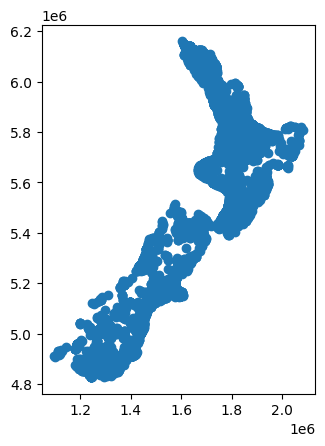

In [63]:
# test plot NZ data
nz_tiles.to_crs(CRS_NZ).centroid.plot()

In [6]:
#nz_tiles.explore(column = "avg_d_kbps", scheme="NaturalBreaks" )

#nz_tiles.explore(column = "avg_d_kbps", scheme="UserDefined", classification_kwds={'bins':[0, 50000, 100000, 250000]} )
# goepandas plot - https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
# geopandas tutorial user guide - https://geopandas.org/en/stable/docs/user_guide/mapping.html

In [7]:
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url

#speedtest import data from aws

In [8]:
tile_url = get_tile_url("fixed", 2023, 4)
tile_url
#let's load Q2, Q3 22 data

'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2023/quarter%3D4/2023-10-01_performance_fixed_tiles.zip'

In [9]:
print (datetime.now())
# tells me how long takes to import data

2025-07-17 22:09:55.576660


In [10]:
tiles = gp.read_file(tile_url)
# load times - 30 mins (Sun pm), 8 mins (Mon am), 12mins (Sun pm), 11mins (Sat pm)
# load time -  12 mins (Fri am), 14 mins (Fri am)
# load time - 6 mins, (Fri pm),  6 mins (Fri pm) (now at 100Mbps, was 50Mbps)
# load time - x mins (Fri pm) (on 100Mbps NBN)
# load time - 7 mins (Th pm) (on 1Gbps Monash LAN)
# load time - 6 mins (Fri am) on Monash eduroam

In [11]:
print (datetime.now())

2025-07-17 22:12:22.487157


In [12]:
len(tiles)
# Q1 21 - 6.3M lines
# Q2 21 - 6.7M lines (global)
# Q3 21 - 6.9M lines
# Q4 21 - 6.7M lines (AU 86115 lines)
# Q1 22 - 6.7M lines (AU 88182 lines)
# Q2 22 - 6.6M lines (AU 86704 lines)
# Q3 22 - 6.609M lines (AU 83458 lines)
# Q1 23 - 6.334M lines (AU 89619 lines)
# Q2 23 - 6.370M lines (AU 90258 lines)
# Q3 23 - 6.67M lines (AU 90249 lines) 
# Q4 23 - 6.65M lines (AU 91750 lines)

# how to save/load
#au_tiles.to_file("speedtest-AUS-Q221.geojson", driver='GeoJSON')
#working - reloaded successfully
# au2_tiles = gp.read_file("speedtest.geojson")

6654855

In [54]:
au_tiles = tiles.cx[113.338953:153.569469 ,	-43.634597:-10.668186]
#nz_tiles = tiles.cx[166.509144322:178.517093541 ,	-46.641235447:-34.4506617165]
#LAX = tiles.cx[-118:-120, 33:35]
len(au_tiles) 
#len(nz_tiles)
# processing World data to Australia subset by bounding box
# source of Bounding Box - World data set
# processing time - 5 mins, 9 mins, <1min (M2)

91750

In [55]:
au_tiles.to_file("speedtest-AUS-Q423.geojson", driver='GeoJSON')
#nz_tiles.to_file("speedtest-NZ-Q323.geojson", driver='GeoJSON')

#write to disk
# then load to figshare: CC-BY-NC https://doi.org/10.6084/m9.figshare.13370504 (Currently at.v22)

<Axes: >

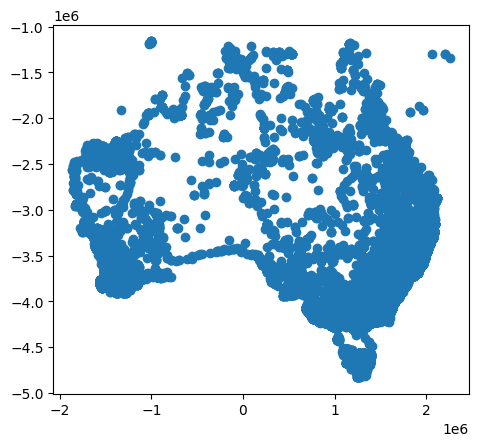

In [61]:
au_tiles.to_crs(CRS_AU).centroid.plot()
#nz_tiles.centroid.plot()
# Visual data inspection
# Q222 - looks like some E.Timor data or Coral Sea (New Guinea?)
# Q423 - looks like E. Timor and Coral Sea, plus Barrier Reef?

In [16]:
au_tiles['avg_d_kbps'].mean()
#nz_tiles['avg_d_kbps'].mean()
# Q2 21 - 52314
# Q3 21 - 54854
# Q4 21 - 57645
# Q1 22 - 56873
# Q2 22 - 58442
# Q3 22 - 61658
# Q1 23 - 69696
# Q2 23 - 74254
# Q3 23 - 79082
#NZ-Q3 23 - 154335


np.float64(82862.42116621253)

In [17]:
au_tiles.describe()
#nz_tiles.describe()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
count,91750.000000,91750.000000,91750.000000,91750.000000,91750.000000
mean,82862.421166,17868.419902,40.059553,18.005123,5.642005
std,63190.889435,19269.786572,92.146631,34.261559,9.824661
min,1.000000,1.000000,0.000000,1.000000,1.000000
25%,41169.000000,9924.000000,11.000000,2.000000,1.000000
50%,67555.000000,16297.500000,19.000000,5.000000,2.000000
75%,108043.500000,20500.000000,38.000000,21.000000,7.000000
max,937600.000000,599626.000000,2374.000000,1513.000000,545.000000


In [18]:
# to do - post to Figshare DONE.
# plot AUS line histogram.
au_tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
6536707,3101033321313311,27255,9674,8,2,2,"POLYGON ((123.04138 -10.72538, 123.04688 -10.7..."
6536708,3101033321313333,27045,17770,7,2,1,"POLYGON ((123.04138 -10.74157, 123.04688 -10.7..."
6536709,3101033321331111,25660,12530,6,9,2,"POLYGON ((123.04138 -10.74697, 123.04688 -10.7..."
6536710,3101033321331122,8733,7402,5,2,1,"POLYGON ((123.0249 -10.76316, 123.0304 -10.763..."
6536711,3101033321331123,14525,3910,5,1,1,"POLYGON ((123.0304 -10.76316, 123.03589 -10.76..."
...,...,...,...,...,...,...,...
6646769,3130102100120230,79389,20156,47,1,1,"POLYGON ((147.84302 -43.15711, 147.84851 -43.1..."
6646770,3130102100120320,11875,7279,44,1,1,"POLYGON ((147.854 -43.15711, 147.8595 -43.1571..."
6646771,3130102100122300,175398,29082,59,1,1,"POLYGON ((147.854 -43.18115, 147.8595 -43.1811..."
6646772,3130102100131020,25245,20466,58,6,1,"POLYGON ((147.96387 -43.14108, 147.96936 -43.1..."


<Axes: >

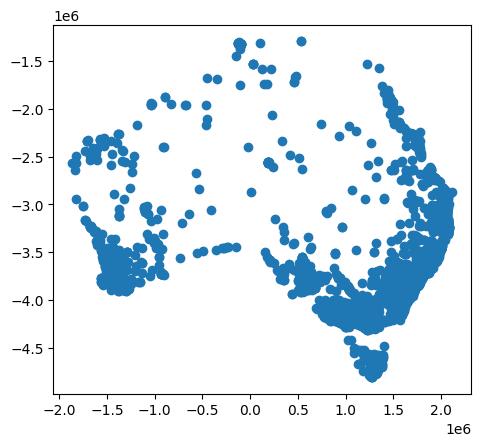

In [64]:
au_tiles.loc[au_tiles['avg_d_kbps'] > 200000].to_crs(CRS_AU).centroid.plot()

In [20]:
au_tiles.loc[au_tiles['avg_d_kbps'] >200000]
#Q2 23 - records over 200Mbps - 3514
#Q2 23 - records over 200Mbps - 3948 (up 15%)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
6538010,3101222333011320,202878,27279,88,5,2,"POLYGON ((115.11475 -21.64722, 115.12024 -21.6..."
6538054,3101223200012033,242700,18804,75,1,1,"POLYGON ((115.41687 -20.68932, 115.42236 -20.6..."
6538055,3101223200012230,239468,39392,52,1,1,"POLYGON ((115.41138 -20.70474, 115.41687 -20.7..."
6538056,3101223200012232,205870,18293,31,1,1,"POLYGON ((115.41138 -20.70988, 115.41687 -20.7..."
6538057,3101223200110100,213403,27496,38,1,1,"POLYGON ((115.59814 -20.63278, 115.60364 -20.6..."
...,...,...,...,...,...,...,...
6646693,3130102010232012,200615,18705,50,13,2,"POLYGON ((147.052 -43.2972, 147.0575 -43.2972,..."
6646698,3130102010312032,236969,11850,58,10,2,"POLYGON ((147.22778 -43.2412, 147.23328 -43.24..."
6646699,3130102010312102,201211,18121,48,2,1,"POLYGON ((147.23877 -43.2332, 147.24426 -43.23..."
6646700,3130102010312201,201847,27358,47,1,1,"POLYGON ((147.22229 -43.2452, 147.22778 -43.24..."


In [21]:
au_tiles.loc[au_tiles['avg_d_kbps'] <10000]
#Q2 23 - records less 10Mbps - 3144
#Q2 23 - records less 10Mbps - 2896 (down 8%)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
6536710,3101033321331122,8733,7402,5,2,1,"POLYGON ((123.0249 -10.76316, 123.0304 -10.763..."
6536720,3101033330220023,327,1227,548,2,1,"POLYGON ((123.05237 -10.76316, 123.05786 -10.7..."
6537983,3101222322203333,1517,996,86,1,1,"POLYGON ((113.98865 -21.8564, 113.99414 -21.85..."
6538000,3101222332123132,7948,2534,73,1,1,"POLYGON ((114.86206 -21.7544, 114.86755 -21.75..."
6538001,3101222332123323,4878,8038,53,2,2,"POLYGON ((114.85657 -21.7748, 114.86206 -21.77..."
...,...,...,...,...,...,...,...
6646730,3130102012110232,1900,1544,67,1,1,"POLYGON ((147.22778 -43.35314, 147.23328 -43.3..."
6646759,3130102100030010,4450,132,89,5,1,"POLYGON ((147.75513 -43.13306, 147.76062 -43.1..."
6646760,3130102100030011,8456,873,35,1,1,"POLYGON ((147.76062 -43.13306, 147.76611 -43.1..."
6646767,3130102100120113,1183,812,578,1,1,"POLYGON ((147.87048 -43.13707, 147.87598 -43.1..."


<Axes: >

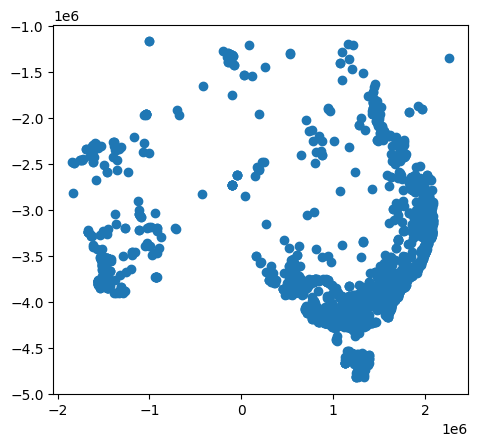

In [65]:
au_tiles.loc[au_tiles['avg_d_kbps'] <10000].to_crs(CRS_AU).centroid.plot()

array([[<Axes: title={'center': 'avg_d_kbps'}>]], dtype=object)

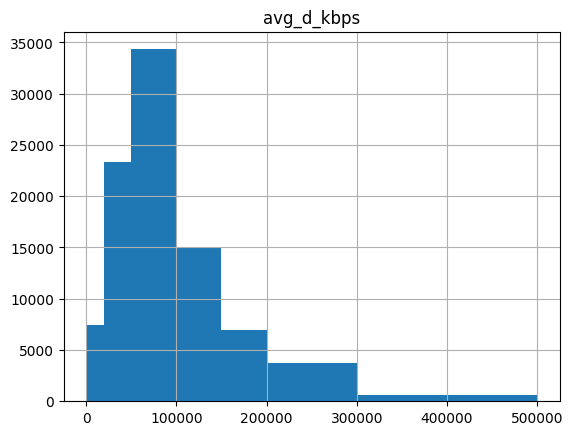

In [23]:
#df.hist(column='session_duration_seconds', bins=25, bins=[0,.5,.75,1]))
au_tiles.hist(column='avg_d_kbps', bins=[0,20000, 50000, 100000, 150000, 200000, 300000, 500000])